# Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import Data

In [2]:
DATA_RAW_PATH = '../data/raw/'
DATA_PREPROCESSED_PATH = '../data/preprocessed/'

In [3]:
train_data = pd.read_csv(DATA_RAW_PATH + 'Train_BigMart.csv')

In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Dictionary

- **Item_Identifier**: nombre o identificador del producto
- **Item_Weight:** peso del producto en gramos
- **Item_Fat_Content**: clasificación del producto en términos de grasas contenidas en él.
- **Item_Visibility**: scoring de visibilidad del producto: medida que hace referencia al conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el producto?
- **Item_Type**: tipo de producto
- **Item_MRP**: máximum retailed price. Precio calculado por el fabricante que indica el precio más alto que se puede cobrar por el producto.
- **Outlet_Identifier**: identificador de la tienda
- **Outlet_Establishment_Year**: año de lanzamiento de la tienda
- **Outlet_Size**: tamaño de la tienda
- **Outlet_Location_Type**: clasificación de las tiendas según ubicación
- **Outlet_Type**: tipo de tienda
- **Item_Outlet_Sales**: ventas del producto en cada observacion

# Exploratory Data Analysis

## Data Types

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical variables:**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

We will analyze each of them to identify which would be useful to convert to a numerical variable for a future regression model.

**Numerical variables:**
- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year (It may be convenient to create a "store_age" column in years).
- Item_Outlet_Sales (Variable to predict)

We will analyze the distribution of these variables and their relationship with the variable to be predicted, to determine if it is interesting to keep them in a dataset for a future regression model.

## What does each row represent?

In [7]:
train_data.Item_Identifier.nunique()

1559

In [8]:
train_data.Outlet_Identifier.nunique()

10

In [9]:
train_data[train_data.duplicated(subset=['Item_Identifier','Outlet_Identifier'], keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**Observations:**
- In each row we have the sale of a certain product (out of a total of 1559 products) sold by outlet (We can see that there are no repeated rows per product and store).
- We do not know in which unit the "Item_Outlet_Sales" column is. But since each product has a certain number of grams associated with it, we can assume that the column to be predicted is expressed in grams as well. In addition, the column "Item_Outlet_Sales", is expressed as a float, and not as an integer quantity.

## Some statistical data

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## Univariate Analysis

**Item_Outlet_Sales (Target Variable)**

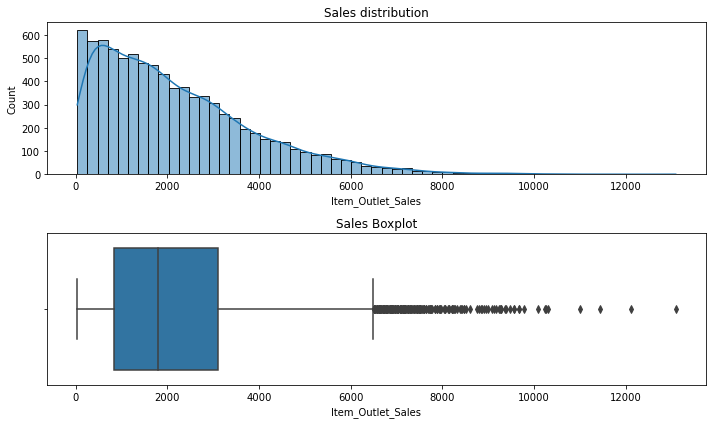

In [11]:
fig, axs = plt.subplots(2, figsize = (10,6))
plt1 = sns.histplot(train_data['Item_Outlet_Sales'], kde=True, ax = axs[0]).set(title='Sales distribution')
plt2 = sns.boxplot(x=train_data["Item_Outlet_Sales"], ax = axs[1]).set(title='Sales Boxplot')
plt.tight_layout()

**Observations:**
- Approximately 75% of sales are concentrated below the 3200 value.
- There is a low percentage of sales above 6200 (outliers).

## Bivariate Analysis

**Let's see how Sales are related with other variables using scatter plot.**

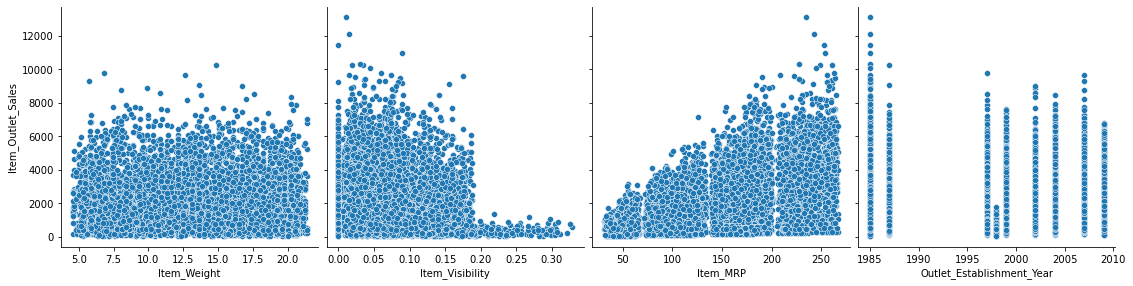

In [12]:
sns.pairplot(train_data, 
             x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'], 
             y_vars='Item_Outlet_Sales', 
             height=4, 
             aspect=1, 
             kind='scatter')
plt.show()

In [13]:
set(list(train_data['Outlet_Establishment_Year'].unique()))

{1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009}

**Observations:**
- Item_Weight: There is no clear pattern relating the weight of items sold to sales. We can see fewer items sold with high sales values. It would be an uninteresting variable to include in a sales prediction model.
- Item_Visibility: There is a group of items with visibility values between 0.20 and 0.40 that have low sales volume. Since there is visible variation, this would be a variable to keep for a predictive model.
- Item_MRP: There is an increasing relationship between "item_MRP", which is the maximum price of the item suggested by the manufacturer, and sales. Since there is visible relation, this would be a variable to keep for a predictive model.
- Outlet_Establishment_Year: There are variations in sales values depending on the store's launch year. There is a decrease in sales in the store launched in 1998. As expected, there is a higher sales volume in the oldest store (from 1985). There was a period of years where no stores were opened (1987 to 1997). Since there is visible variation, this would be a variable to keep for a predictive model (maybe transformed in "Outlet_age").

**Correlation Matrix**

Let's see the correlation between different numerical variables.

<ipython-input-14-dc84cb5022db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap="YlGnBu", annot = True)


<Axes: >

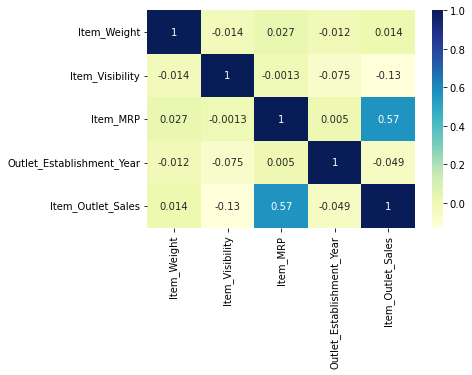

In [14]:
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot = True)

- As we had seen in the scatter plots, the variable "Item_MRP" has a positive correlation with the variable "Item_Outlet_Sales" ( higher than 0.5). 
- The rest of the correlations represent non-significant values (close to zero).

**Let's see how Sales are related with other categorical variables.**

**Item_Fat_Content**

In [15]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Vemos que es necesario reescribir las categorías de "Item_Fat_Content", las dejaremos como:
```
{ 
'low fat': 'Low Fat',
'LF': 'Low Fat',
'reg': 'Regular'
}
```

In [16]:
fat_dict = { 
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
}
train_data['Item_Fat_Content'].replace(fat_dict, inplace=True)

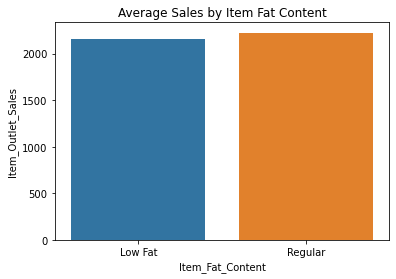

In [17]:
avg_sales_by_item_fat_content = train_data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

sns.barplot(data=avg_sales_by_item_fat_content, x="Item_Fat_Content", y="Item_Outlet_Sales")\
.set(title="Average Sales by Item Fat Content");

- 'Item_Fat_Content' would be an uninteresting variable to include in a sales prediction model.

**Item_Type**

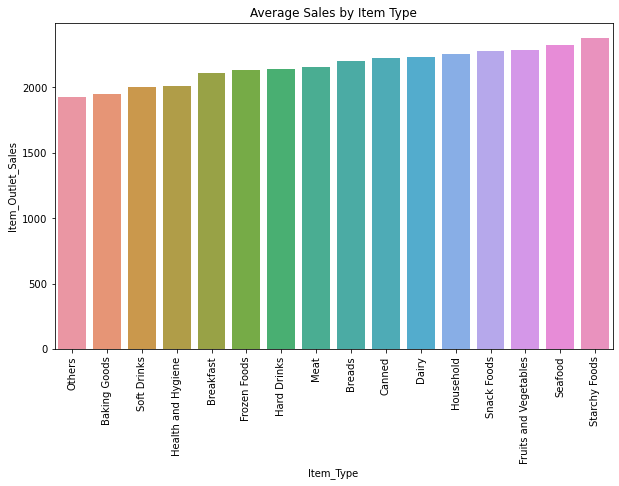

In [18]:
avg_sales_by_item_type = train_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_sales_by_item_type, x="Item_Type", y="Item_Outlet_Sales")\
.set(title="Average Sales by Item Type")
plt.xticks(rotation=90);

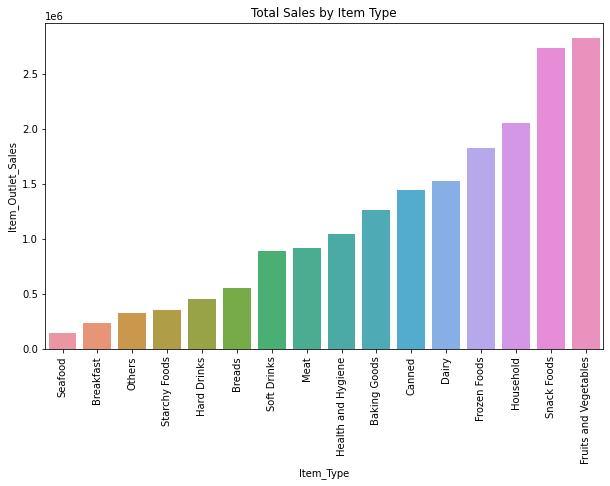

In [19]:
total_sales_by_item_type = train_data.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=total_sales_by_item_type, x="Item_Type", y="Item_Outlet_Sales")\
.set(title="Total Sales by Item Type")
plt.xticks(rotation=90);

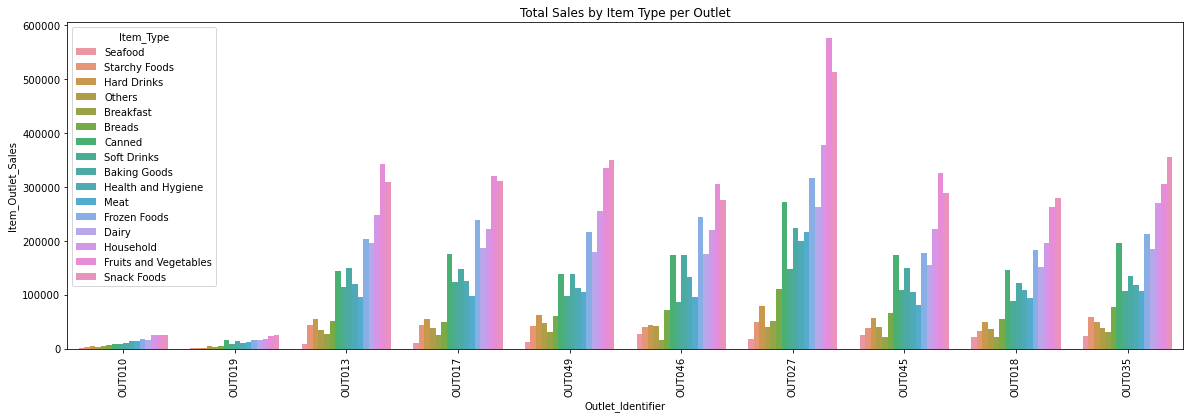

In [20]:
total_sales_by_item_type = train_data.groupby(['Item_Type', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(20,6))
sns.barplot(data=total_sales_by_item_type, x="Outlet_Identifier", y="Item_Outlet_Sales", hue='Item_Type')\
.set(title="Total Sales by Item Type per Outlet")
plt.xticks(rotation=90);

- It is interesting to look at item sales by store. We see similar behavior in all stores, with different sales volumes.
- On average, sales per item are similar independently of the store.
- Because of these variations, we will keep this variable to see its impact on the model.

**Outlet_Identifier**

[Text(0.5, 1.0, 'Average Sales by Outlet')]

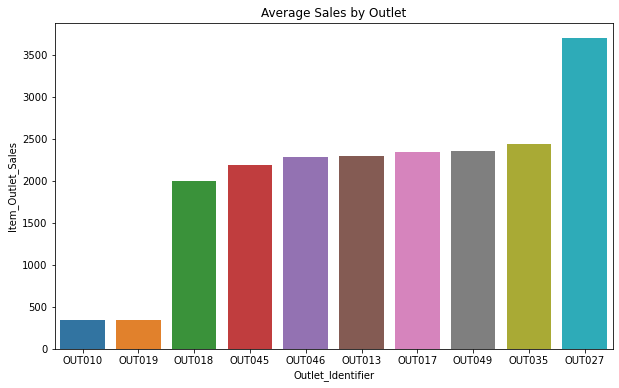

In [21]:
avg_sales_by_outlet_id = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_sales_by_outlet_id, x="Outlet_Identifier", y="Item_Outlet_Sales")\
.set(title="Average Sales by Outlet")

In [22]:
train_data[['Outlet_Identifier', 'Outlet_Establishment_Year']].drop_duplicates().sort_values(by='Outlet_Establishment_Year')

,Outlet_Identifier,Outlet_Establishment_Year
7,OUT027,1985
23,OUT019,1985
4,OUT013,1987
11,OUT046,1997
3,OUT010,1998
0,OUT049,1999
8,OUT045,2002
19,OUT035,2004
9,OUT017,2007
1,OUT018,2009


- Similar average sales are displayed for most stores, with higher sales for "OUT027" and sales well below the rest of the stores for "OUT010" and "OUT09". Therefore, it would be a variable to include in the regression model.
- We see that the oldest stores do not always have the highest sales averages, but we do not know if they are still in operation, for example.

**Outlet_Size**

[Text(0.5, 1.0, 'Average Sales by Outlet Size')]

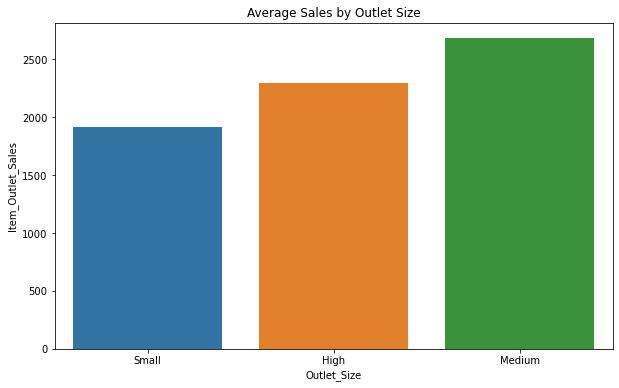

In [23]:
avg_sales_by_outlet_size = train_data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_sales_by_outlet_size, x="Outlet_Size", y="Item_Outlet_Sales")\
.set(title="Average Sales by Outlet Size")

- Average sales by outlet type have a small variation, so we will keep this variable in the model.

**Outlet_Location_Type**

[Text(0.5, 1.0, 'Average Sales by Outlet Location Type')]

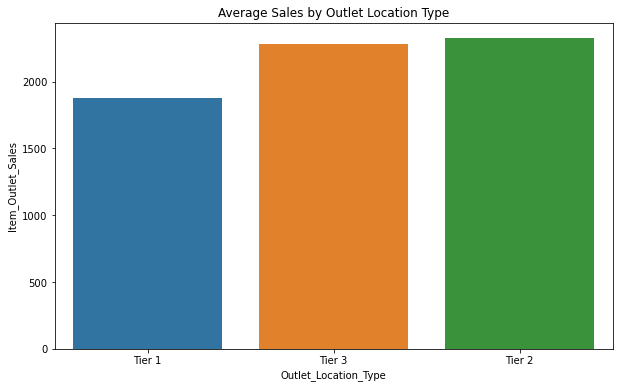

In [24]:
avg_sales_by_outlet_location_type = train_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_sales_by_outlet_location_type, x="Outlet_Location_Type", y="Item_Outlet_Sales")\
.set(title="Average Sales by Outlet Location Type")

- Average sales by outlet location type have a small variation, so we will keep this variable in the model.

**Outlet_Type**

[Text(0.5, 1.0, 'Average Sales by Outlet Type')]

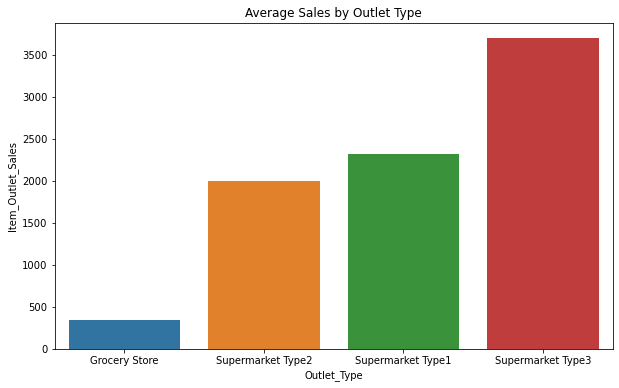

In [25]:
avg_sales_by_outlet_type = train_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Item_Outlet_Sales')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_sales_by_outlet_type, x="Outlet_Type", y="Item_Outlet_Sales")\
.set(title="Average Sales by Outlet Type")

- Average sales are higher for "Supermarket Type3" and lower for "Grocery Store", so for these variations, it will be interesting to keep the variable for the regression model.

## Export Dataset with interesting columns

In [27]:
train_data = train_data.drop('Item_Weight', axis=1)

In [28]:
train_data.to_csv(DATA_PREPROCESSED_PATH + 'train_data_selected_columns.csv', index=False)

## Conclusions

- Due to the analysis carried out, there are certain variations in the following variables with respect to sales, which is why it was decided to keep them for a future regression model:
    - Item_Fat_Content
    - Item_Type
    - Outlet_Identifier
    - Outlet_Size
    - Outlet_Location_Type
    - Outlet_Type
    - Item_Visibility
    - Item_MRP
    - Outlet_Establishment_Year

- The variable "Item_Weight" was discarded.